In [113]:
import pandas as pd 
listrik = pd.read_csv("AEP_hourly.csv")

listrik.head()


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [114]:
listrik

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [115]:
listrik = listrik.sort_values('Datetime')
listrik

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


In [116]:
listrik['Datetime'] = pd.to_datetime(listrik['Datetime'])
listrik.set_index('Datetime', inplace=True)

# Resample ke harian dengan menjumlahkan
daily_listrik = listrik.resample('D').sum()

# ✅ Biarkan index tetap datetime
print(daily_listrik.index)
print(daily_listrik.head())


DatetimeIndex(['2004-10-01', '2004-10-02', '2004-10-03', '2004-10-04',
               '2004-10-05', '2004-10-06', '2004-10-07', '2004-10-08',
               '2004-10-09', '2004-10-10',
               ...
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01',
               '2018-08-02', '2018-08-03'],
              dtype='datetime64[ns]', name='Datetime', length=5055, freq='D')
              AEP_MW
Datetime            
2004-10-01  328544.0
2004-10-02  311997.0
2004-10-03  293450.0
2004-10-04  343417.0
2004-10-05  346553.0


In [117]:
daily_listrik

,AEP_MW
Datetime,
2004-10-01,328544.0
2004-10-02,311997.0
2004-10-03,293450.0
2004-10-04,343417.0
2004-10-05,346553.0
...,...
2018-07-30,368834.0
2018-07-31,364327.0
2018-08-01,363628.0


In [95]:
daily_listrik.tail()

,AEP_MW
Datetime,
2018-07-30,368834.0
2018-07-31,364327.0
2018-08-01,363628.0
2018-08-02,376504.0
2018-08-03,14809.0


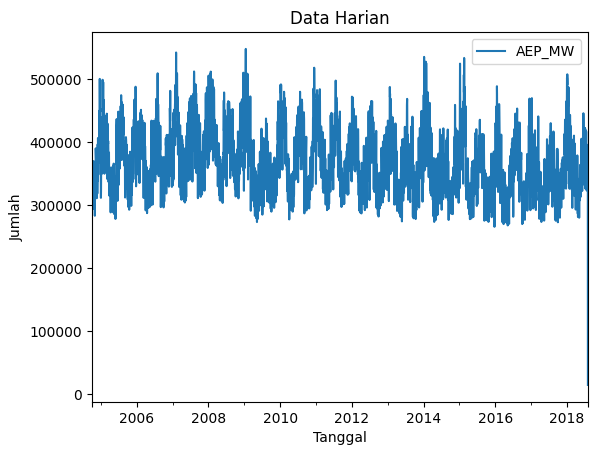

In [118]:
import matplotlib.pyplot as plt

daily_listrik.plot()
plt.title("Data Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah")
plt.show()


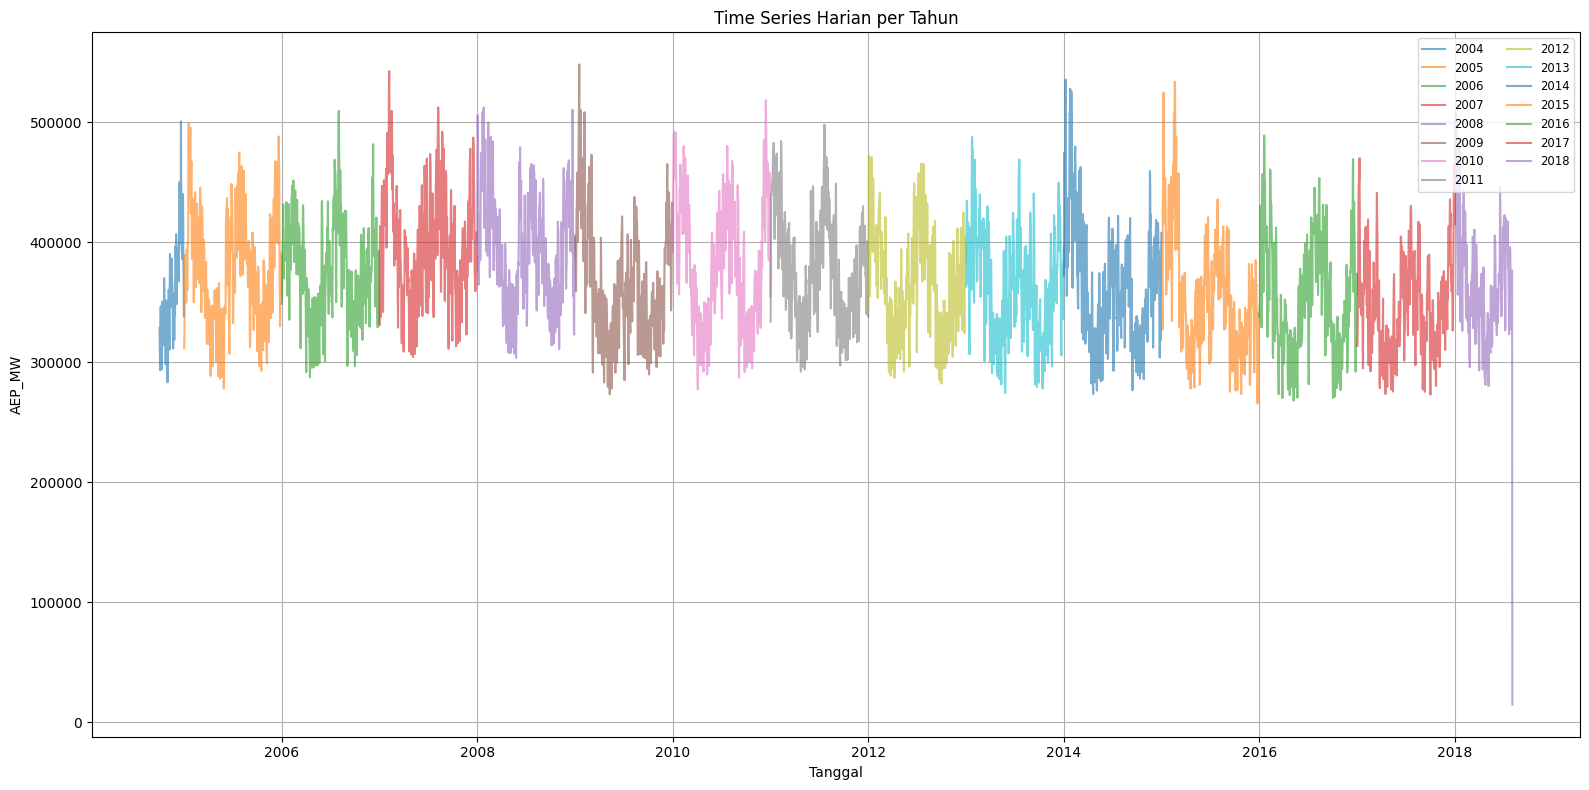

In [ ]:
import matplotlib.pyplot as plt

# Tambahkan kolom tahun dari index
daily_listrik['year'] = daily_listrik.index.year

# Cek nama kolom numerik (misalnya 'nilai', 'daya_kwh', dll.)
nama_kolom_nilai = daily_listrik.columns[0]  # asumsi kolom pertama = data yang ingin diplot

plt.figure(figsize=(16, 8))

# Loop per tahun
for tahun in sorted(daily_listrik['year'].unique()):
    data_tahun = daily_listrik[daily_listrik['year'] == tahun]
    plt.plot(data_tahun.index, data_tahun[nama_kolom_nilai], label=str(tahun), alpha=0.6)


plt.title("Time Series Harian per Tahun")
plt.xlabel("Tanggal")
plt.ylabel(nama_kolom_nilai)
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


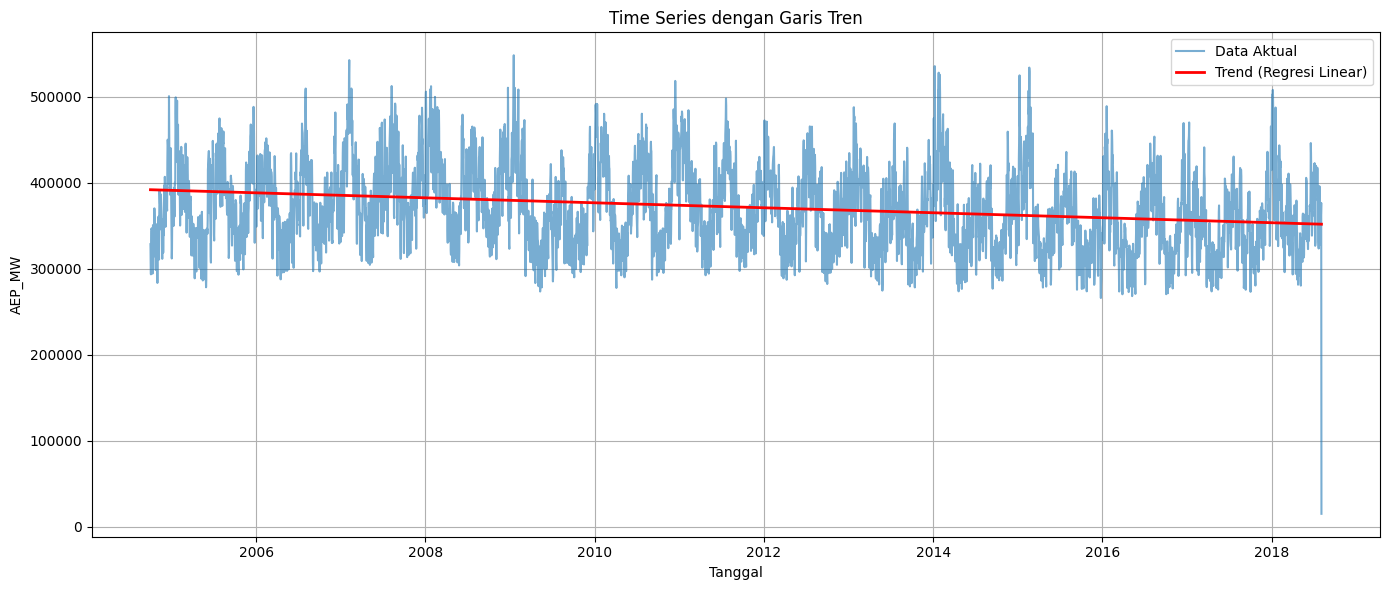

In [122]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Misalnya: daily_listrik (sudah datetime index), dan kolom nilai: 'AEP_MW'
data = daily_listrik.copy().dropna()
y = data['AEP_MW'].values
X = np.arange(len(y)).reshape(-1, 1)  # waktu sebagai variabel independen

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Plot asli + tren
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, y, label='Data Aktual', alpha=0.6)
plt.plot(data.index, trend, label='Trend (Regresi Linear)', color='red', linewidth=2)
plt.title("Time Series dengan Garis Tren")
plt.xlabel("Tanggal")
plt.ylabel("AEP_MW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


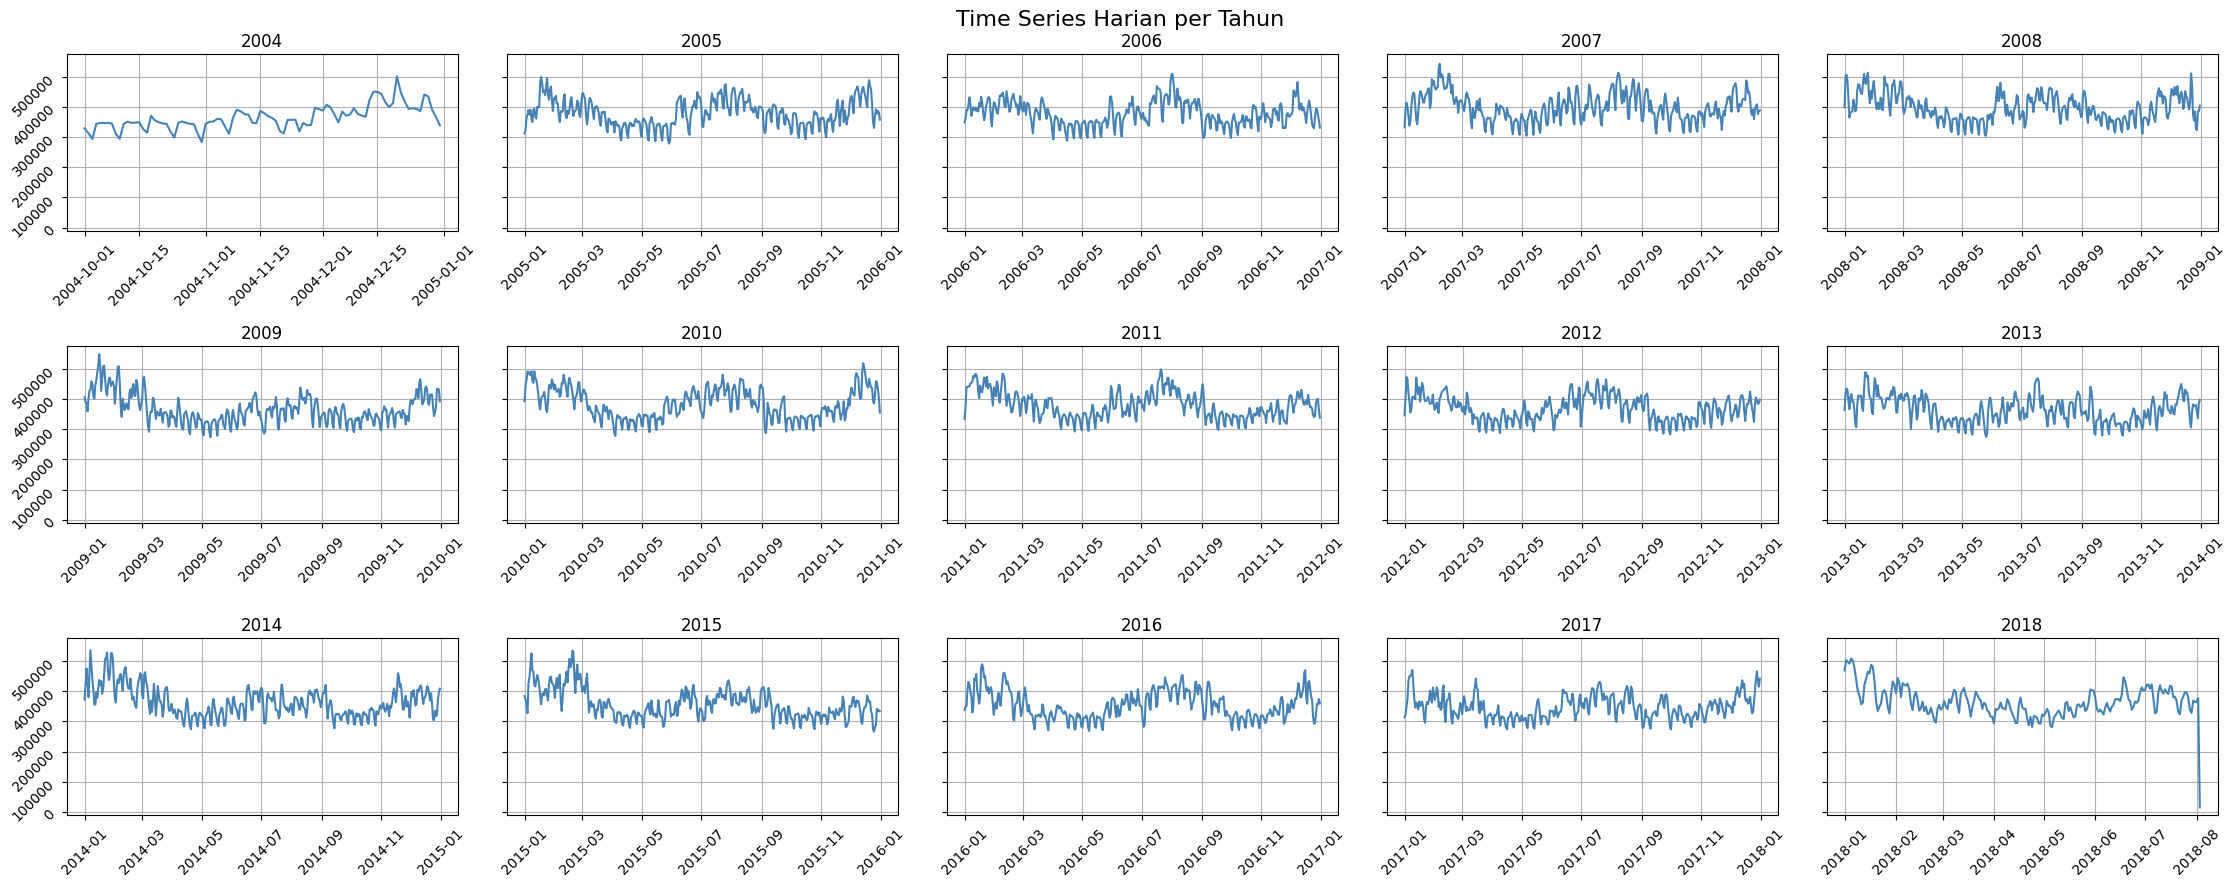

In [120]:
import matplotlib.pyplot as plt

# Pastikan kolom 'year' sudah ada
daily_listrik['year'] = daily_listrik.index.year

# Ambil nama kolom nilai (misal: daya, kwh, dsb.)
nama_kolom_nilai = daily_listrik.columns[0]  # atau ganti manual: 'daya_kwh'

# Dapatkan daftar tahun unik
tahun_unik = sorted(daily_listrik['year'].unique())

# Setup subplot (misalnya: 5 kolom per baris)
n = len(tahun_unik)
cols = 5
rows = -(-n // cols)  # ceil division

fig, axes = plt.subplots(rows, cols, figsize=(4.5*cols, 3*rows), sharey=True)

axes = axes.flatten()  # supaya gampang di-loop

# Plot tiap tahun ke subplot
for i, tahun in enumerate(tahun_unik):
    ax = axes[i]
    data_tahun = daily_listrik[daily_listrik['year'] == tahun]
    ax.plot(data_tahun.index, data_tahun[nama_kolom_nilai], color='steelblue')
    ax.set_title(str(tahun))
    ax.grid(True)
    ax.tick_params(labelrotation=45)

# Kosongkan subplot sisanya jika tidak terpakai
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Time Series Harian per Tahun", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()



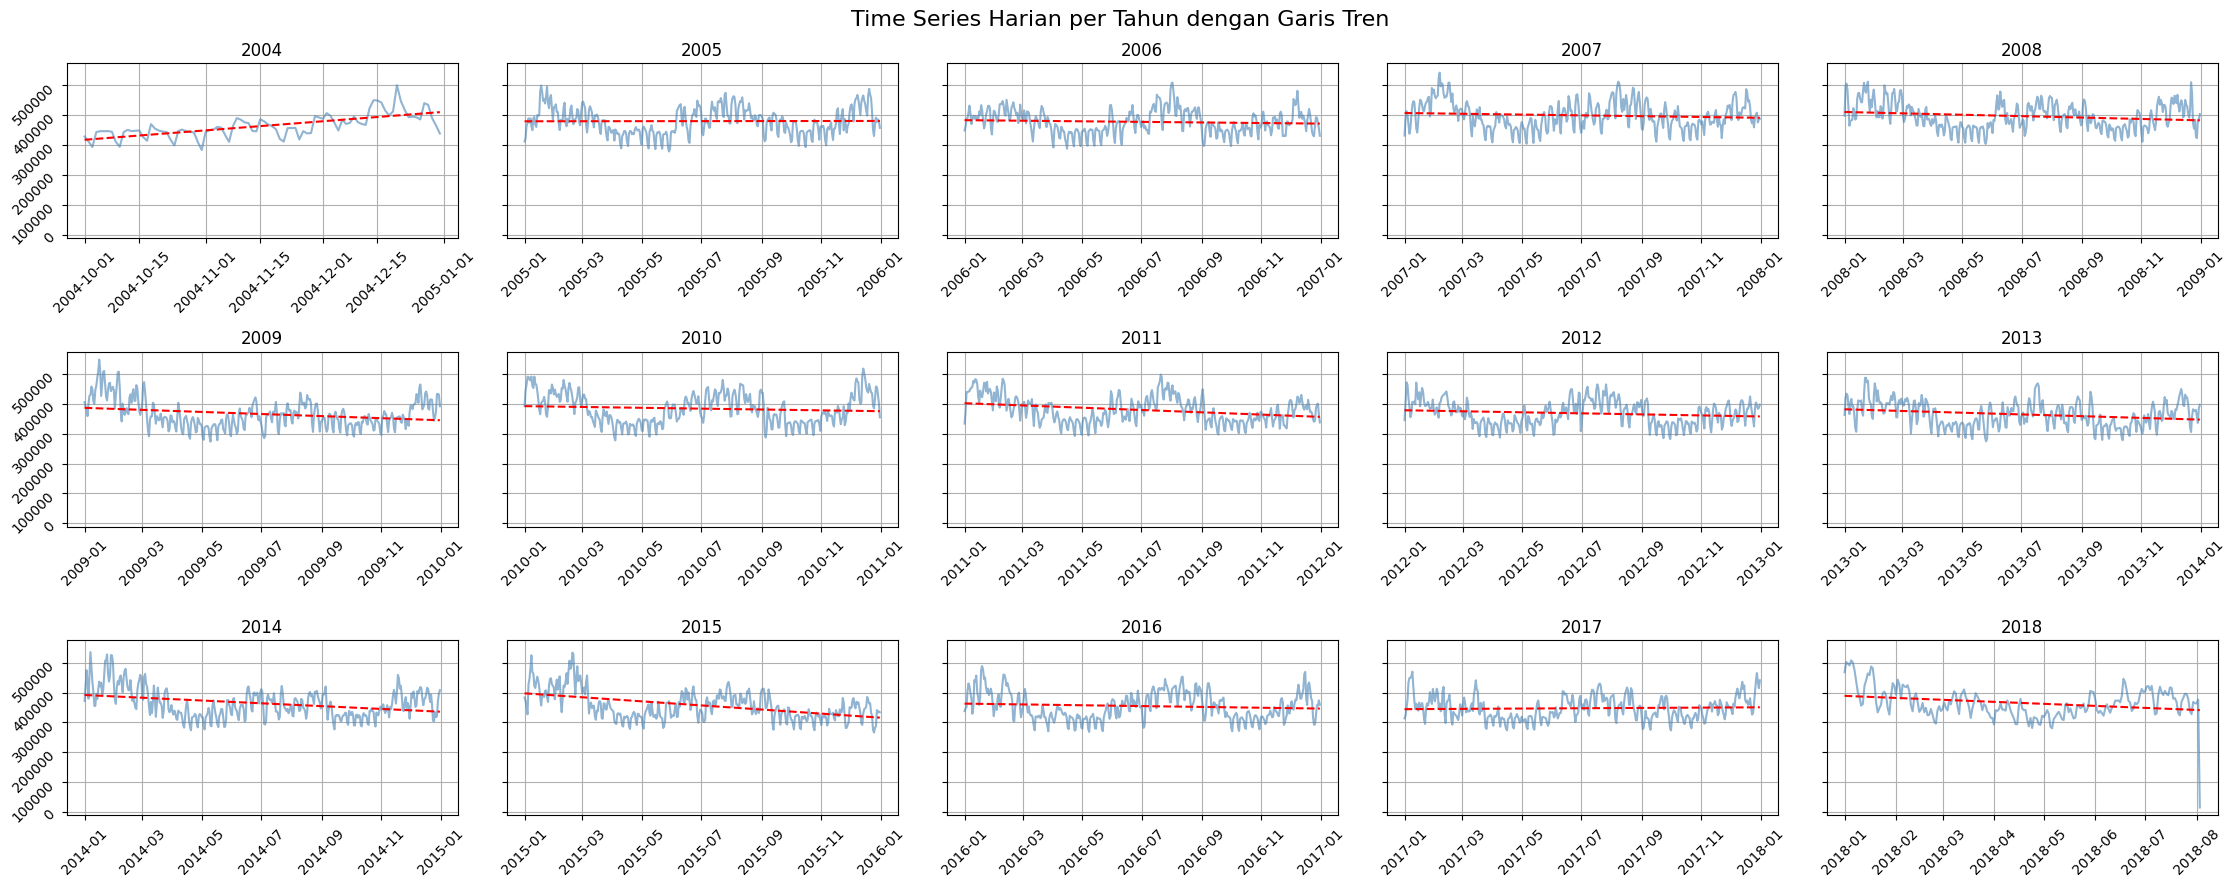

In [123]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Pastikan 'year' sudah ada
daily_listrik['year'] = daily_listrik.index.year

# Nama kolom yang ingin diplot
nama_kolom_nilai = 'AEP_MW'  # ganti sesuai kolommu

# Tahun-tahun unik
tahun_unik = sorted(daily_listrik['year'].unique())
n = len(tahun_unik)
cols = 5
rows = -(-n // cols)  # ceil division

fig, axes = plt.subplots(rows, cols, figsize=(4.5*cols, 3*rows), sharey=True)
axes = axes.flatten()

for i, tahun in enumerate(tahun_unik):
    ax = axes[i]
    data_tahun = daily_listrik[daily_listrik['year'] == tahun].dropna(subset=[nama_kolom_nilai])

    # Plot data aktual
    ax.plot(data_tahun.index, data_tahun[nama_kolom_nilai], label='Aktual', color='steelblue', alpha=0.6)

    # Buat X sebagai urutan angka (bukan datetime)
    X = np.arange(len(data_tahun)).reshape(-1, 1)
    y = data_tahun[nama_kolom_nilai].values

    # Linear regression untuk tren
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    # Plot tren
    ax.plot(data_tahun.index, trend, color='red', linestyle='--', label='Tren')

    ax.set_title(f"{tahun}")
    ax.tick_params(labelrotation=45)
    ax.grid(True)

# Hapus sisa axis jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Time Series Harian per Tahun dengan Garis Tren", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [125]:
adft = adfuller(daily_listrik, autolag="AIC")
print("p-value:", adft[1])


ValueError: x is required to have ndim 1 but has ndim 2

## Lags

In [121]:
lags = [1,3,6,9]

for lag in lags:
    autocorrelation_lag = daily_listrik['#AEP_MW'].autocorr(lag=lag)
    print(autocorrelation_lag)

KeyError: '#AEP_MW'

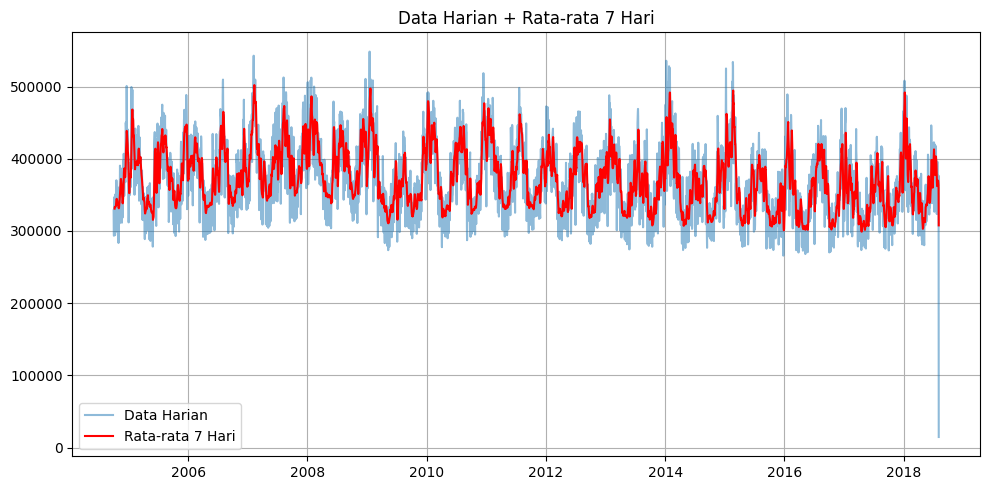

In [10]:
rolling = daily_listrik['AEP_MW'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_listrik.index, daily_listrik['AEP_MW'], label='Data Harian', alpha=0.5)
plt.plot(rolling, label='Rata-rata 7 Hari', color='red')
plt.title("Data Harian + Rata-rata 7 Hari")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


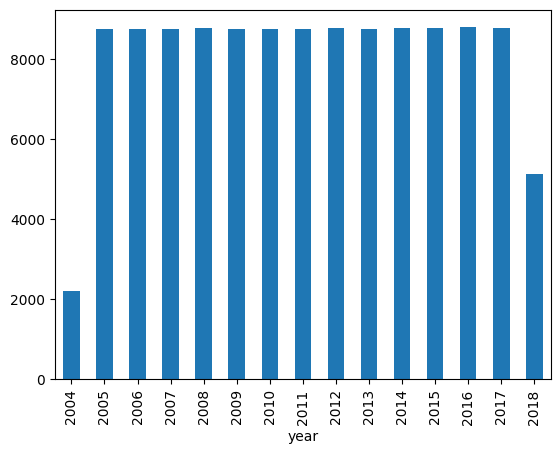

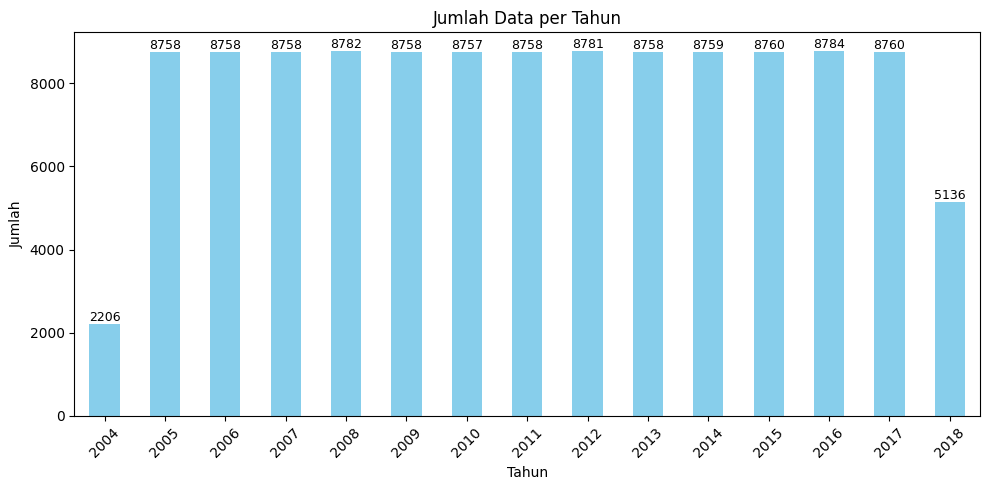

In [18]:
data_per_year = listrik['year'].value_counts().sort_index()
data_per_year.plot(kind='bar')

import matplotlib.pyplot as plt

data_per_year = listrik['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
ax = data_per_year.plot(kind='bar', color='skyblue')
plt.title("Jumlah Data per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)

# Tambahkan angka di atas batang
for i, value in enumerate(data_per_year):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


all_years = pd.Series(range(listrik['year'].min(), listrik['year'].max() + 1))
data_per_year = listrik['year'].value_counts().reindex(all_years, fill_value=0).sort_index()


In [19]:
listrik = listrik.set_index('Datetime')
rata2_tahunan = listrik.resample('Y').mean()
rata2_tahunan.index = rata2_tahunan.index.year

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rata2_tahunan.index, rata2_tahunan['nilai'], marker='o', color='green')
plt.title("Rata-rata Harian per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Nilai Harian")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\71476\AppData\Local\Temp\ipykernel_24964\2021191725.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rata2_tahunan = listrik.resample('Y').mean()


KeyError: 'nilai'

<Figure size 1000x500 with 0 Axes>